In [1]:
import pandas, numpy

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20})

# 0. user-defined variables

In [2]:
data_file ='/home/adrian/projects/HUVECs/data/csv/HUVEC_AllMeasurements_Summary_21.12.2020.Intracellular.csv'

# 1. read data

In [3]:
df = pandas.read_csv(data_file)
df.astype('float', errors='ignore')
df.head()

,Sample ID,Experiment,Treatment,Timepoint (h),Cell numbers,Palmitate,Stearic acid,UDP_Glucose,ATP,UDP_glucuronate,AMP,cAMP,UDP_N_acetylglucosamine,Glutamate,Malate,Succinate,Glutamine,Citrate,Glutathion Ox,Glutathione Red
0,1,2,0.0,0,480000,0.498134,0.355130,0.555664,1.173089,1.471127,0.378996,1.439743,0.948270,0.672770,0.935037,1.085146,0.950878,1.019898,1.358301,0.340923
1,2,2,0.0,0,480000,0.649966,0.504734,5.899347,1.642630,3.903292,0.289142,1.956214,0.514516,0.563908,1.423291,1.002194,0.685802,0.790827,0.804011,0.259466
2,3,2,0.0,0,480000,1.037842,0.811131,4.862396,4.494113,2.117562,0.172695,0.184441,0.314264,0.389639,0.940041,0.833751,0.527135,0.510089,0.913530,0.162939
3,4,2,0.0,4,560000,0.899369,1.097788,0.507172,0.605210,0.965708,1.235501,1.984364,2.796323,2.053525,2.922242,1.885886,1.702201,1.803593,1.404071,2.868344
4,5,2,0.0,4,560000,0.924384,0.881210,0.677431,0.683501,0.771615,0.747560,1.616192,1.380128,1.282800,2.280236,1.018277,1.199941,1.047429,0.818987,1.483302


# 2. format data

## 2.1. select appropriate rows

In [4]:
df = df[df['Cell numbers'].str.isnumeric()]
df['Cell numbers'] = df['Cell numbers'].astype(float)

In [5]:
pandas.set_option("display.max_rows", 200, "display.max_columns", 20)
print(df)

     Sample ID   Experiment  Treatment  Timepoint (h)  Cell numbers  \
0             1           2        0.0              0      480000.0   
1             2           2        0.0              0      480000.0   
2             3           2        0.0              0      480000.0   
3             4           2        0.0              4      560000.0   
4             5           2        0.0              4      560000.0   
5             6           2        0.0              4      560000.0   
6             7           2        0.5              4      510000.0   
7             8           2        0.5              4      510000.0   
8             9           2        0.5              4      510000.0   
9            10           2        5.0              4      380000.0   
10           11           2        5.0              4      380000.0   
11           12           2        5.0              4      380000.0   
12           13           2       50.0              4      205000.0   
13    

# 3. plot

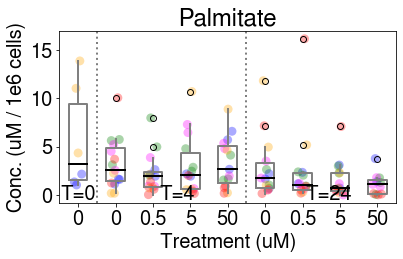

8 significant 2.339190214886299 1.2378334890479439 0.033330424727798694


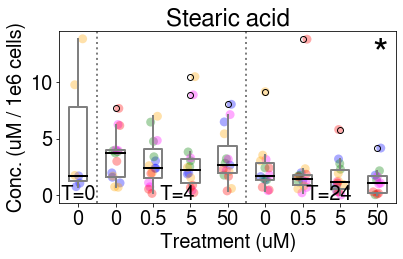

8 very significant 1.9162315071809395 0.42164422390333706 0.0008239917222403884


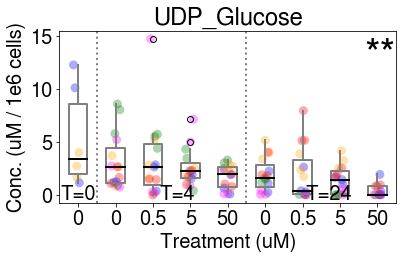

8 significant 2.082267602561169 1.9341695142996376 0.016894419691834778


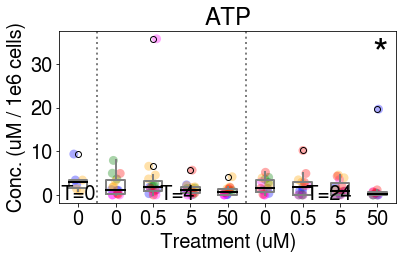

8 very significant 1.6868942346483544 0.4831808716627534 0.008977188227699934


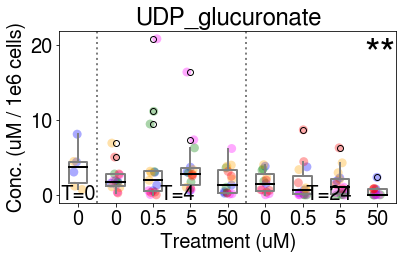

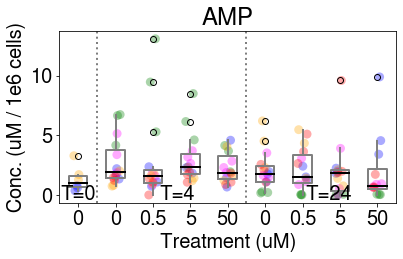

3 significant 3.4796666934909544 4.857673756259668 0.028196182113415784


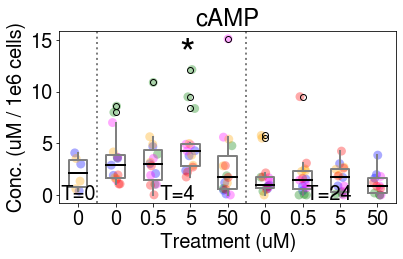

8 significant 2.5471834893440573 1.5688037960255257 0.019049518089930412


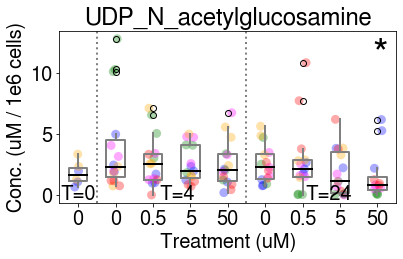

8 very significant 2.4401563744206687 1.150754116368817 0.006866975484090444


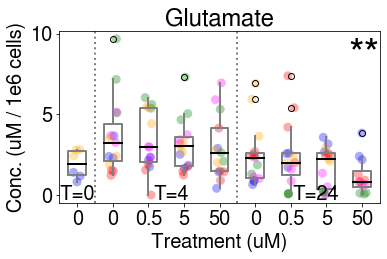

3 significant 6.406519610630955 2.1677098812918114 0.042375089412920584
4 significant 6.406519610630955 1.5060820447064345 0.014403184987913039
6 significant 0.7594303451550829 3.0948723645996563 0.017769933712024174


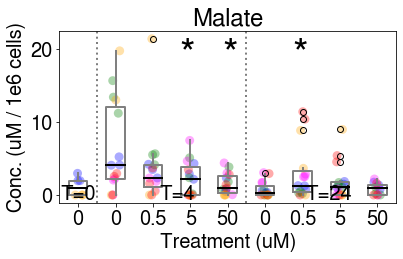

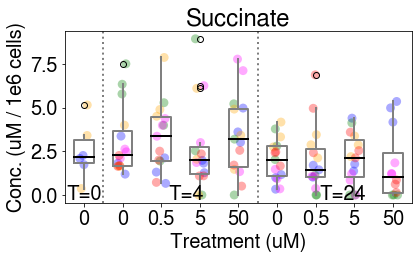

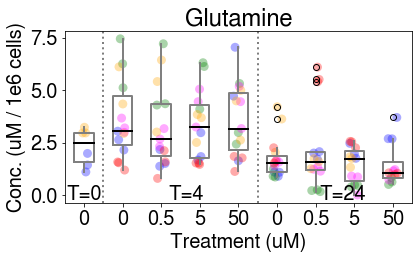

8 significant 2.7308441563939394 1.6706684903191338 0.011635146004975378


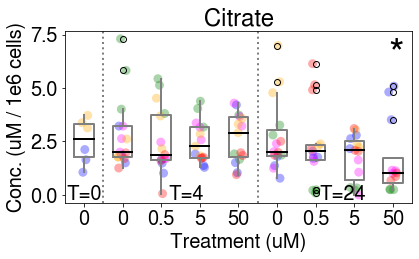

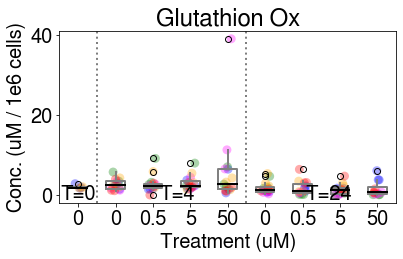

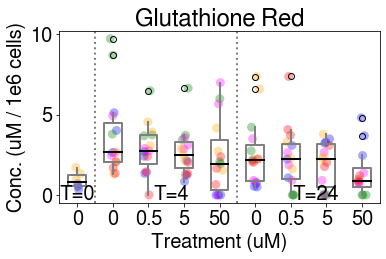

In [6]:
for metab in df.columns[5:]:
        
    loc_zero_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 0)][metab].values
    loc_four_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 4)][metab].values
    loc_four_half = df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 4)][metab].values
    loc_four_five = df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 4)][metab].values
    loc_four_fifty = df[(df['Treatment'] == 50) & (df['Timepoint (h)'] == 4)][metab].values
    loc_twentyfour_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 24)][metab].values
    loc_twentyfour_half = df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 24)][metab].values
    loc_twentyfour_five = df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 24)][metab].values
    loc_twentyfour_fifty = df[(df['Treatment'] == 50) & (df['Timepoint (h)'] == 24)][metab].values
    
    cf1 = 1e6/df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 0)]['Cell numbers'].values
    cf2 = 1e6/df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 4)]['Cell numbers'].values
    cf3 = 1e6/df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 4)]['Cell numbers'].values
    cf4 = 1e6/df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 4)]['Cell numbers'].values
    cf5 = 1e6/df[(df['Treatment'] == 50) & (df['Timepoint (h)'] == 4)]['Cell numbers'].values
    cf6 = 1e6/df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 24)]['Cell numbers'].values
    cf7 = 1e6/df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 24)]['Cell numbers'].values
    cf8 = 1e6/df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 24)]['Cell numbers'].values
    cf9 = 1e6/df[(df['Treatment'] == 50) & (df['Timepoint (h)'] == 24)]['Cell numbers'].values
    
    quant = [loc_zero_zero*cf1, loc_four_zero*cf2, loc_four_half*cf3, loc_four_five*cf4, loc_four_fifty*cf5, loc_twentyfour_zero*cf6, loc_twentyfour_half*cf7, loc_twentyfour_five*cf8, loc_twentyfour_fifty*cf9]
    
    # experimental labels
    loc_zero_zero_exp = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 0)]['Experiment'].values
    loc_four_zero_exp = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 4)]['Experiment'].values
    loc_four_half_exp = df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 4)]['Experiment'].values
    loc_four_five_exp = df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 4)]['Experiment'].values
    loc_four_fifty_exp = df[(df['Treatment'] == 50) & (df['Timepoint (h)'] == 4)]['Experiment'].values
    loc_twentyfour_zero_exp = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 24)]['Experiment'].values
    loc_twentyfour_half_exp = df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 24)]['Experiment'].values
    loc_twentyfour_five_exp = df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 24)]['Experiment'].values
    loc_twentyfour_fifty_exp = df[(df['Treatment'] == 50) & (df['Timepoint (h)'] == 24)]['Experiment'].values
    
    experiments = [loc_zero_zero_exp, loc_four_zero_exp, loc_four_half_exp, loc_four_five_exp, loc_four_fifty_exp, loc_twentyfour_zero_exp, loc_twentyfour_half_exp, loc_twentyfour_five_exp, loc_twentyfour_fifty_exp]
    
    ###
    ### boxplots
    ###
    
    f = matplotlib.pyplot.figure()
    ax = f.add_subplot(111)
    
    filtered = [element[~numpy.isnan(element)] for element in quant]
    
    matplotlib.pyplot.boxplot(filtered, showcaps=False, medianprops=dict(linewidth=2, color='black'), boxprops=dict(linewidth=2, color='gray'), whiskerprops=dict(linewidth=2, color='gray'))
    
    ###
    ### statistics
    ###
    
    for pos in [2, 3, 4]:
        stat, pvalue = scipy.stats.mannwhitneyu(filtered[1], filtered[pos])
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(filtered[1]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/7.9, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(filtered[1]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/7.9, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            
    for pos in [6, 7, 8]:
        stat, pvalue = scipy.stats.mannwhitneyu(filtered[5], filtered[pos])
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(filtered[5]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/8.4, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(filtered[5]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/8.4, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            
    ###
    ### scatter plots
    ###
    
    x=[]; y=[]; exp_colors=[]
    for i in range(len(quant)):
        for j in range(len(quant[i])):
            
            shift = 0.25
            r=-shift/2 + shift*numpy.random.random()
            x.append(i+1+r)
            
            y.append(quant[i][j])
            
            the_color = None
            if experiments[i][j] == 2:
                the_color = 'blue'
            elif experiments[i][j] == 3:
                the_color = 'green'
            elif experiments[i][j] == 5:
                the_color = 'magenta'
            elif experiments[i][j] == 6:
                the_color = 'orange'
            elif experiments[i][j] == 7:
                the_color = 'red'
            else:
                raise ValueError('no color map found')
            exp_colors.append(the_color)
            
    matplotlib.pyplot.scatter(x, y, s=80, c=exp_colors, alpha=1/3, linewidths=0)
    
    matplotlib.pyplot.axvline(1.5, alpha=0.5, lw=2, color='black', ls=':')
    matplotlib.pyplot.axvline(5.5, alpha=0.5, lw=2, color='black', ls=':')
    
    matplotlib.pyplot.text(0.055, 0.05, 'T=0', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.35, 0.05, 'T=4', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.8, 0.05, 'T=24', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    
    matplotlib.pyplot.xlabel('Treatment (uM)')
    matplotlib.pyplot.ylabel('Conc. (uM / 1e6 cells)')
    matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['0', '0', '0.5', '5', '50', '0', '0.5', '5', '50'])
    matplotlib.pyplot.title(metab)
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()